### 体彩双色球网页数据获取并计算所有数字出现概率  
create_date: 19-03-07  
update_date: 19-03-17 

In [70]:
import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# 由于数量较多，设置下pandas显示条目数量
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 50)

# 用于正常显示中文标签
plt.rcParams["font.sans-serif"]=['SimHei']  
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

In [22]:
# 测试read_html方法，读取网页上的表格数据
data = pd.DataFrame()
for i in range(1, 121): # 当前总数约120页，可以到具体页面查看下
    try:
        url = 'http://kaijiang.zhcw.com/zhcw/html/ssq/list_{}.html'.format(i)
        cell = pd.read_html(url, skiprows=[0,1])[0]
        cell = cell[0:len(cell)-1]
        data = data.append(cell)
    except Exception as e:
        print(e)
        break
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2388 entries, 0 to 7
Data columns (total 7 columns):
0    2388 non-null object
1    2388 non-null float64
2    2388 non-null object
3    2388 non-null float64
4    2388 non-null object
5    2388 non-null float64
6    0 non-null float64
dtypes: float64(4), object(3)
memory usage: 149.2+ KB


In [80]:
#todo 计算所有号码的出现次数；
num_arr = []
for i in data[2]:
    num_arr = num_arr + i.split('  ')
df1 = pd.DataFrame(pd.Series(num_arr).value_counts().sort_index())
df2 = pd.DataFrame(pd.Series(num_arr).value_counts(normalize=True).sort_index()) #normalize=True 计算概率
ret = pd.merge(df1, df2, left_index=True, right_index=True)
# ret['0_y'] = ret['0_y'].apply(lambda x : str(round(x*100,4))+'%')
ret.rename(columns={'0_x':'count','0_y':'rate'})

,count,rate
01,621,0.037150
02,573,0.034279
03,582,0.034817
04,562,0.033620
05,586,0.035056
06,591,0.035355
07,604,0.036133
08,580,0.034697
09,579,0.034637
10,577,0.034518


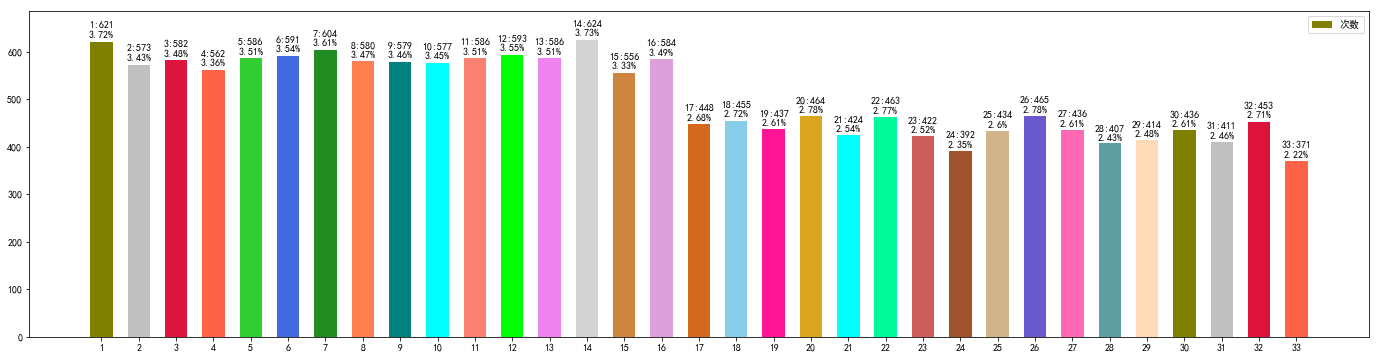

In [157]:
# 柱状体：
fig, ax = plt.subplots(figsize=(24,6))

colors = "lime,goldenrod,cadetblue,deeppink,lightgrey,skyblue,\
salmon,olive,indianred,crimson,hotpink,coral,plum,violet,cyan,\
slateblue,forestgreen,mediumspringgreen,peachpuff,limegreen,chocolate,\
tomato,coral,royalblue,silver,tan,aqua,sienna,teal,peru,mediumspringgreen"
colors = set(colors.split(','))

width = 0.6
x = np.arange(1, len(ret)+1)
rect = ax.bar(x, ret['0_x'], width=width, label='次数',color=colors)
ax.set_xticklabels(set(range(1,33)))
ax.legend()
ax.set_ylim(0,max(ret['0_x'])*1.1)
ax.set_xticks(x)
ax.set_xticklabels(set(x))

def autolabel(rects, xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off
    i=0
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}:{}\n{}%'.format(i+1, height, round(ret['0_y'][i]*100,2)),
                ha=ha[xpos], va='bottom')
        i = i+1

autolabel(rect)
